# A/B Testing: Cambio de color de CTA

## Definición del problema

**Objetivo**: Analizar si un cambio mínimo en el color de los CTA (Call to Action) de nuestra página web afecta la tasa de conversión.

* **Grupo A (Control):** Se muestra el CTA en azul (diseño antiguo).
* **Grupo B (Prueba):** Se muestra el CTA en naranja (diseño nuevo).

## Hipótesis

* **H0 (Hipótesis nula):** No hay diferencia en la tasa de conversión entre la página antigua y la página con modificaciones realizadas por el equipo.
* **H1 (Hipótesis alternativa):** La tasa de conversión es más alta en la nueva versión de la página web.

## Variable dependiente

La variable dependiente es la tasa de conversión, representada en la columna "Conversión" del conjunto de datos:

* "No": El usuario no compró el producto durante la sesión.
* "Yes": El usuario compró el producto durante la sesión.

## Pasos para el análisis

1.  **Preparación de datos:**
    * Verificar la integridad de los datos (valores únicos, nulos, etc.).
    * Convertir la columna "Conversión" a numérica (1 para "Yes", 0 para "No").
2.  **Análisis descriptivo:**
    * Calcular la tasa de conversión para cada grupo (A y B).
    * Crear un gráfico de barras para visualizar la diferencia.
3.  **Prueba de hipótesis:**
    * Realizar una prueba chi-cuadrado para determinar si hay una diferencia significativa entre los grupos.
    * Interpretar el p-valor para rechazar o no la hipótesis nula.
4.  **Conclusión:**
    * Responder a la pregunta inicial sobre el impacto del cambio de color en la tasa de conversión.

## Consideraciones

* El tamaño de la muestra es crucial para la validez de los resultados.
* El nivel de significancia (alfa) y el poder estadístico deben tenerse en cuenta.

In [1]:
#Primero importamos todas las librerías necesarias
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
from src import soporte_abtesting as sa


# Otros recursos
# ------------------------------------------------------------------------------
import math

# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

In [2]:
#Importamos el csv ab_testing.csv que es donde tenemos los datos de la prueba A/B y lo hacemos quitando el índice del csv

df = pd.read_csv('data/ab_testing.csv', index_col=0)
df.head()

,Group,Page Views,Time Spent,Conversion,Device,Location
User ID,,,,,,
14292,B,3,424,No,Mobile,Northern Ireland
11682,A,9,342,No,Mobile,Scotland
19825,A,2,396,No,Desktop,Northern Ireland
16080,B,4,318,No,Desktop,Wales
18851,A,1,338,Yes,Desktop,Scotland


Viendo los datos del dataframe podemos calcular la tasa de conversión de cada grupo y graficar los resultados. Utilizaremos los datos de grupo A como si fueran los iniciales ya que son personas que no han sido expuestas a la nueva versión de la página web. Por lo tanto, el grupo A es el grupo de control y el grupo B es el grupo de prueba.


In [3]:
#calculamos la tasa de conversión media para el grupo A que suponemos que es el grupo de control y, como no tenemos datos iniciales, partimos de estos como base.
df_grupoA = df[df["Group"] == "A"]
#Calculamos primero el número de usuarios del DF_A con Cnversión = Yes y luego el número total de usuarios del DF_A.
df_A_conversion = df_grupoA[df_grupoA["Conversion"] == "Yes"].shape[0]
df_A_total = df_grupoA.shape[0]
#Calculamos la tasa de conversión media para el grupo A
conversion_rate_inicial = (df_A_conversion / df_A_total).__round__(2)
print(f"la tasa de conversión inicial es: {conversion_rate_inicial}")

la tasa de conversión inicial es: 0.05


In [4]:
# Calculamos la diferencia esperada entre la tasa de conversión incial que es 0.05 y la esperada que queremos que sea 0.07
diferencia = sms.proportion_effectsize(conversion_rate_inicial, 0.07)

# Definimos una variable para establecer el nivel de significancia
alpha = 0.05 

# Definimos una variable para establecer el la potencia deseada
power = 0.80 

# Usamos el método NormalIndPower, para poder aplicar la fórmula que hemos aprendido
analisis = NormalIndPower()

# Aplicamos el método 'solve_power' para calcular el tamaño muestral. Este método no hace otra cosa más que aplicar la fórmula que vimos previamente
tamaño_nuestral = analisis.solve_power(diferencia, power = power, nobs1= None, ratio = 1.0, alpha = alpha)
print(f'El tamaño muestral debe de ser de: {math.ceil(tamaño_nuestral)}')

El tamaño muestral debe de ser de: 2199


In [5]:
# A continuación despúes de tener el mataño muestral, aplicamos las funciones de soporte para su analisis.
sa.exploracion_dataframe(df, "Group")

El número de datos es 5000 y el de columnas es 6

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 128

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Group,object
Page Views,int64
Time Spent,int64
Conversion,object
Device,object
Location,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GROUP tiene las siguientes valore únicos:


,count
Group,
A,2519
B,2481


La columna CONVERSION tiene las siguientes valore únicos:


,count
Conversion,
No,4515
Yes,485


La columna DEVICE tiene las siguientes valore únicos:


,count
Device,
Desktop,2538
Mobile,2462


La columna LOCATION tiene las siguientes valore únicos:


,count
Location,
Scotland,1281
England,1246
Northern Ireland,1242
Wales,1231



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
Group,2481,1,B,2481
Conversion,2481,2,No,2132
Device,2481,2,Desktop,1294
Location,2481,4,England,640



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
Page Views,2481.0,7.492946,3.963448,1.0,4.0,8.0,11.0,14.0
Time Spent,2481.0,243.303910,119.193552,40.0,136.0,244.0,348.0,449.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
Group,2519,1,A,2519
Conversion,2519,2,No,2383
Device,2519,2,Mobile,1275
Location,2519,4,Scotland,670



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
Page Views,2519.0,7.581580,4.080066,1.0,4.0,8.0,11.0,14.0
Time Spent,2519.0,241.733227,117.340026,40.0,137.5,241.0,343.0,449.0


Déspues de la exploración inical de los datos tenemos para realizar nuestra primera prueba, necesitamos 2199 y tenemos 2500 de cada uno por lo que tenemos un tamaño de muestra suficiente. Comprobamos que no tenemos valores nulos pero si tenemos duplicados que eliminamos. 


In [6]:
# Eliminamos los valores duplicados
df.drop_duplicates(inplace=True)

In [7]:
# Volvemos a analizar el dataframe después de eliminar los duplicados
sa.exploracion_dataframe(df, "Group")

El número de datos es 4872 y el de columnas es 6

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Group,object
Page Views,int64
Time Spent,int64
Conversion,object
Device,object
Location,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GROUP tiene las siguientes valore únicos:


,count
Group,
A,2453
B,2419


La columna CONVERSION tiene las siguientes valore únicos:


,count
Conversion,
No,4389
Yes,483


La columna DEVICE tiene las siguientes valore únicos:


,count
Device,
Desktop,2478
Mobile,2394


La columna LOCATION tiene las siguientes valore únicos:


,count
Location,
Scotland,1243
England,1214
Wales,1208
Northern Ireland,1207



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
Group,2419,1,B,2419
Conversion,2419,2,No,2072
Device,2419,2,Desktop,1263
Location,2419,4,England,623



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
Page Views,2419.0,7.494419,3.959298,1.0,4.0,8.0,11.0,14.0
Time Spent,2419.0,242.872675,119.201043,40.0,136.0,244.0,348.0,449.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
Group,2453,1,A,2453
Conversion,2453,2,No,2317
Device,2453,2,Mobile,1238
Location,2453,4,Scotland,647



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
Page Views,2453.0,7.575214,4.088009,1.0,4.0,8.0,11.0,14.0
Time Spent,2453.0,241.487974,117.566483,40.0,137.0,240.0,343.0,449.0


In [8]:
# Hacemos un head para comprobar que los datos estan limpios.
df.head()

,Group,Page Views,Time Spent,Conversion,Device,Location
User ID,,,,,,
14292,B,3,424,No,Mobile,Northern Ireland
11682,A,9,342,No,Mobile,Scotland
19825,A,2,396,No,Desktop,Northern Ireland
16080,B,4,318,No,Desktop,Wales
18851,A,1,338,Yes,Desktop,Scotland


In [9]:
# Por lo que empezamos con el análisis y seleecionamos 2199 ususarios del grupo A y 2199 del grupo B, que es el tamaño muestral que hemos calculado anteriormente.
grupo_control = df[df["Group"] == "A"].sample(n=2199, random_state=1)
grupo_tratamiento = df[df["Group"] == "B"].sample(n=2199, random_state=1)
# Unimos los dos grupos en un solo dataframe
ab_test = pd.concat([grupo_control, grupo_tratamiento], axis=0)
# Comprobamos que el tamaño muestral es correcto
ab_test["Group"].value_counts()

Group
A    2199
B    2199
Name: count, dtype: int64

In [10]:
# Printeamos el nuevo dataframe
ab_test

,Group,Page Views,Time Spent,Conversion,Device,Location
User ID,,,,,,
12851,A,1,304,No,Mobile,Scotland
13051,A,1,368,No,Mobile,Scotland
15762,A,1,135,No,Mobile,Northern Ireland
14458,A,12,144,No,Mobile,Scotland
19153,A,1,121,No,Mobile,Wales
...,...,...,...,...,...,...
17089,B,9,111,No,Desktop,Scotland
15149,B,3,383,No,Desktop,England
10467,B,4,324,No,Desktop,Wales


In [11]:
# Emmpezamos a graficar los resultados de la prueba A/B
# Vamos a convertir la columna de conversion en un valor binario, donde 1 es Yes y 0 es No.
ab_test["Conversion"] = ab_test["Conversion"].map({"Yes": 1, "No": 0})
ab_test["Conversion"] = ab_test["Conversion"].astype(int)

,mean,std
Group,,
A,0.0546,0.2272
B,0.1460,0.3532


C:\Users\User\AppData\Local\Temp\ipykernel_4552\2272748984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(ratio_conversion, x=ratio_conversion.index, y="mean", palette="dark", edgecolor=".3")


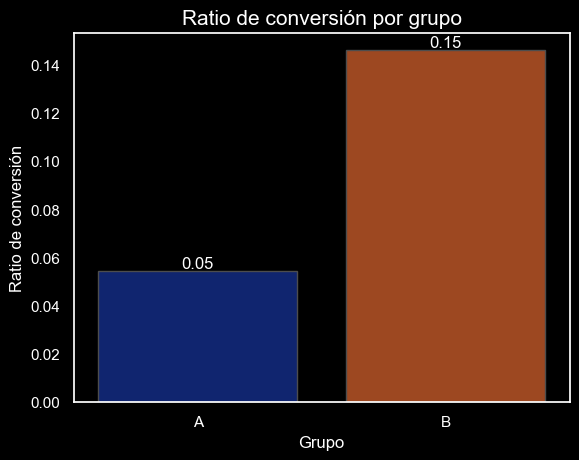

In [12]:
#calculamos la tasa de conversión por grupo utilizando el método groupby() y la función agg() para calcular la media y la desviación estándar de la columna "Conversion".
ratio_conversion = ab_test.groupby('Group')['Conversion'].agg(["mean", "std"]).round(4)
display(ratio_conversion)
#graficamos para verlo mejor
fig = sns.barplot(ratio_conversion, x=ratio_conversion.index, y="mean", palette="dark", edgecolor=".3")
fig.set_title("Ratio de conversión por grupo", fontsize=15)
fig.set_xlabel("Grupo", fontsize=12)
fig.set_ylabel("Ratio de conversión", fontsize=12)
#agregamos los valores de la tasa de conversión en la parte superior de cada barra
for p in fig.patches:
    fig.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='white', xytext=(0, 5), textcoords='offset points')
 

A priori, se observa una disparidad notable en las tasas de conversión entre los grupos de control (A) y prueba (B), con una aparente superioridad en el grupo B. No obstante, este último exhibe una mayor dispersión en sus datos, lo que sugiere una variabilidad intrínseca elevada.

Dado el diseño experimental, que implica la comparación de medias entre dos grupos independientes y un tamaño de muestra sustancial, se propone la aplicación de una prueba Z para validar la hipótesis nula (H0). Esta prueba estadística paramétrica, adecuada para muestras de gran tamaño, evaluará si la diferencia observada entre las medias de los grupos es estadísticamente significativa.

El criterio de rechazo de la hipótesis nula se establecerá mediante el p-valor derivado de la prueba Z. Si el p-valor excede el umbral de significancia predefinido (α = 0.05), no se dispondrá de evidencia suficiente para refutar H0, implicando la ausencia de una diferencia significativa entre las tasas de conversión. Por el contrario, un p-valor inferior a 0.05 permitirá rechazar H0, corroborando la existencia de una diferencia estadísticamente significativa entre los grupos."



In [13]:
# Realiamos la clase de metodos estadistico para ver si los resultados son significativos o no.
ab_testing = sa.Pruebas_parametricas("Group", "Conversion", ab_test, "B", "A")
# ejecutmaos el z.test para ver si los resultados son significativos o no.
ab_testing.z_test()

El estadístico de prueba (Z) es: -10.09, el p-valor es 0.0
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.


# CONCLUSIÓN FINAL 
El p-valor es menor a 0.05, lo que indica que existe una diferencia significativa entre los grupos A y B. Por lo tanto, se rechaza la hipótesis nula (H0) y se acepta la hipótesis alternativa (H1). Esto sugiere que el cambio de color del CTA ha tenido un impacto positivo en la tasa de conversión, siendo más efectiva la nueva versión (grupo B) en comparación con la antigua (grupo A).
